In [1]:
pip install kaggle

In [2]:
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

In [3]:
!kaggle datasets download -d redwankarimsony/heart-disease-data

Dataset URL: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data
License(s): copyright-authors
  0% 0.00/12.4k [00:00<?, ?B/s]
100% 12.4k/12.4k [00:00<00:00, 21.5MB/s]


In [4]:
!unzip heart-disease-data.zip

Archive:  heart-disease-data.zip
  inflating: heart_disease_uci.csv   


In [184]:
import pandas as pd
df = pd.read_csv('heart_disease_uci.csv')

In [185]:
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
# prompt: delete outliers in column trestbps

import numpy as np
# Calculate the z-score for each data point in the trestbps column
z_scores = np.abs((df['trestbps'] - df['trestbps'].mean()) / df['trestbps'].std())

# Define a threshold for outlier identification
threshold = 3

# Select data points that are not outliers
df = df[z_scores <= threshold]

# Print the updated DataFrame
df


In [162]:
df.duplicated().sum()

0

In [163]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [164]:
df = df.replace({False: 0, True: 1})

In [165]:
# Drop columns: 'thal', 'ca'
df = df.drop(columns=['thal', 'ca', 'slope', 'dataset', 'id'])

In [166]:
# Drop rows with missing data in columns: 'fbs', 'trestbps' and 3 other columns
df = df.dropna(subset=['fbs', 'trestbps', 'chol', 'restecg', 'oldpeak'])

In [167]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
num         0
dtype: int64

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 919
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       740 non-null    int64  
 1   sex       740 non-null    object 
 2   cp        740 non-null    object 
 3   trestbps  740 non-null    float64
 4   chol      740 non-null    float64
 5   fbs       740 non-null    float64
 6   restecg   740 non-null    object 
 7   thalch    740 non-null    float64
 8   exang     740 non-null    float64
 9   oldpeak   740 non-null    float64
 10  num       740 non-null    int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 69.4+ KB


In [169]:
# Encode categorical variables

df = pd.get_dummies(df, columns=['sex', 'cp', 'restecg'])
df.head()


,age,trestbps,chol,fbs,thalch,exang,oldpeak,num,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality
0,63,145.0,233.0,1.0,150.0,0.0,2.3,0,False,True,False,False,False,True,True,False,False
1,67,160.0,286.0,0.0,108.0,1.0,1.5,2,False,True,True,False,False,False,True,False,False
2,67,120.0,229.0,0.0,129.0,1.0,2.6,1,False,True,True,False,False,False,True,False,False
3,37,130.0,250.0,0.0,187.0,0.0,3.5,0,False,True,False,False,True,False,False,True,False
4,41,130.0,204.0,0.0,172.0,0.0,1.4,0,True,False,False,True,False,False,True,False,False


In [170]:
df = df.replace({False: 0, True: 1})

In [171]:
df

,age,trestbps,chol,fbs,thalch,exang,oldpeak,num,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality
0,63,145.0,233.0,1.0,150.0,0.0,2.3,0,0,1,0,0,0,1,1,0,0
1,67,160.0,286.0,0.0,108.0,1.0,1.5,2,0,1,1,0,0,0,1,0,0
2,67,120.0,229.0,0.0,129.0,1.0,2.6,1,0,1,1,0,0,0,1,0,0
3,37,130.0,250.0,0.0,187.0,0.0,3.5,0,0,1,0,0,1,0,0,1,0
4,41,130.0,204.0,0.0,172.0,0.0,1.4,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,62,158.0,170.0,0.0,138.0,1.0,0.0,1,0,1,1,0,0,0,0,0,1
914,46,134.0,310.0,0.0,126.0,0.0,0.0,2,0,1,1,0,0,0,0,1,0
915,54,127.0,333.0,1.0,154.0,0.0,0.0,1,1,0,1,0,0,0,0,0,1
917,55,122.0,223.0,1.0,100.0,0.0,0.0,2,0,1,1,0,0,0,0,0,1


In [172]:
# Split the dataset into a training set and a testing set.

from sklearn.model_selection import train_test_split

X = df.drop('num', axis=1)
y = df['num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)


X_train shape: (592, 16)
y_train shape: (592,)
X_test shape: (148, 16)
y_test shape: (148,)


In [173]:
# Train a logistic regression model on the training set.

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=100000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=100000)

In [174]:
# Evaluate the model on the testing set using accuracy, precision, recall, and F1 score.

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='weighted')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

Accuracy: 0.6418918918918919
Precision: 0.6418918918918919
Recall: 0.3682297297297297
F1 score: 0.6090451032311496


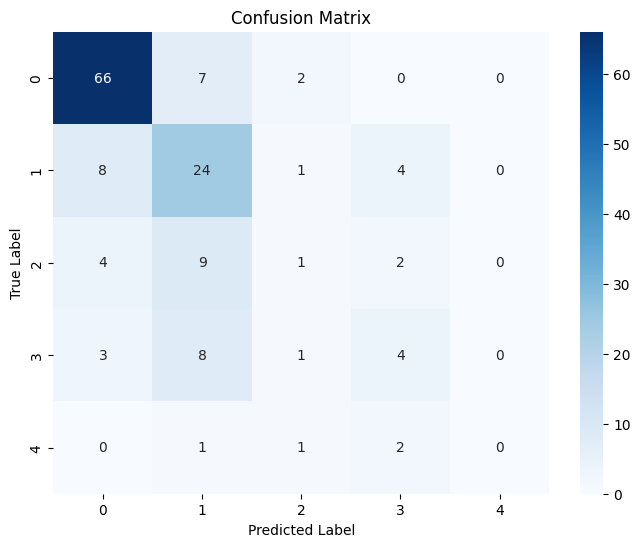

In [175]:
# Use a confusion matrix to visualize the model’s performance.

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [178]:
# Create an example patient data dictionary.
patient_data = {'age': 61,
                'trestbps': 138.0,
                'chol': 166.0,
                'fbs': 0,
                'thalch': 125.0,
                'exang': 1,
                'oldpeak': 3.6,
                'sex_Female': 0,
                'sex_Male': 1,
                'cp_asymptomatic': 1,
                'cp_atypical angina': 0,
                'cp_non-anginal': 0,
                'cp_typical angina': 0,
                'restecg_lv hypertrophy': 1,
                'restecg_normal': 0,
                'restecg_st-t abnormality': 0,

}

# Convert the patient data dictionary to a DataFrame.
patient_df = pd.DataFrame([patient_data])

# Predict the probability of heart disease for the patient.
heart_disease_probability = model.predict_proba(patient_df)[0][1]

# Print the heart disease probability.
print(f'The probability of heart disease for the patient is {heart_disease_probability:.2f}.')


The probability of heart disease for the patient is 0.08.


In [183]:
# Create an example patient data dictionary.
patient_data = {'age': 63,
                'trestbps': 145.0,
                'chol': 233.0,
                'fbs': 1,
                'thalch': 150.0,
                'exang': 1,
                'oldpeak': 2.3,
                'sex_Female': 0,
                'sex_Male': 1,
                'cp_asymptomatic': 0,
                'cp_atypical angina': 0,
                'cp_non-anginal': 0,
                'cp_typical angina': 0,
                'restecg_lv hypertrophy': 1,
                'restecg_normal': 0,
                'restecg_st-t abnormality': 0,

}

# Convert the patient data dictionary to a DataFrame.
patient_df = pd.DataFrame([patient_data])

# Predict the probability of heart disease for the patient.
heart_disease_probability = model.predict_proba(patient_df)[0][1]

# Print the heart disease probability.
print(f'The probability of heart disease for the patient is {heart_disease_probability:.2f}.')

The probability of heart disease for the patient is 0.24.


In [182]:
# Create an example patient data dictionary.
patient_data = {'age': 63,
                'trestbps': 145.0,
                'chol': 233.0,
                'fbs': 1,
                'thalch': 150.0,
                'exang': 1,
                'oldpeak': 2.3,
                'sex_Female': 0,
                'sex_Male': 1,
                'cp_asymptomatic': 0,
                'cp_atypical angina': 0,
                'cp_non-anginal': 0,
                'cp_typical angina': 0,
                'restecg_lv hypertrophy': 1,
                'restecg_normal': 0,
                'restecg_st-t abnormality': 0,

}

# Convert the patient data dictionary to a DataFrame.
patient_df = pd.DataFrame([patient_data])

# Predict the probability of heart disease for the patient.
heart_disease_probability = model.predict_proba(patient_df)[0][1]

# Print the heart disease probability.
print(f'The probability of heart disease for the patient is {heart_disease_probability:.2f}.')

The probability of heart disease for the patient is 0.24.
